# Shallow Trees to learn more

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
import time
import graphviz
import requests     
import shutil       
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import requests
import json
import xgboost
from xgboost import XGBClassifier
from random import randint
import  random
import os
os.chdir('C:/Users/travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import fbeta_score
import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pprint
import pickle
import winsound
from cmath import nan
import plotly
import plotly.express as px
from plotly import graph_objects as go
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import pydot
from IPython.display import Image, display
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree



# Sound Variables
sound_file = "data/audio/Jobs Done.wav"

def play_jobs_done():
    winsound.PlaySound(sound_file, winsound.SND_FILENAME)


bad_sound_file = 'data/audio/Danger Will Robinson.wav'

def play_danger():
    winsound.PlaySound(bad_sound_file, winsound.SND_FILENAME)



### Heavyweights First

In [2]:
# load data 
df  = pd.read_csv('data/final/aggregates/Double_Fights_DF_V16.csv') 
df.head(3)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_Martial_Art_Year_Started_2,A_Martial_Art_3,B_Martial_Art_3,A_Martial_Art_Instructor_3,B_Martial_Art_Instructor_3,A_Martial_Art_Year_Started_3,B_Martial_Art_Year_Started_3,A_Style,B_Style,Style_Matchup
0,0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,...,2009.0,Muay Thai,Brazilian Jiu-Jitsu,Mike Winkeljohn,Instructor: Gustavo Dantas,2001.0,2012.0,Boxing,Boxing,Boxing vs Boxing
1,1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,...,2012.0,Boxing,Boxing,Din Thomas,John Wayne Parr,2012.0,2013.0,Wrestling,Boxing,Wrestling vs Boxing
2,2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,...,2013.0,Brazilian Jiu-Jitsu,Brazilian Jiu-Jitsu,Professor Jason Tooke,Carlos Gracie Jr.,2007.0,2016.0,Wrestling,Brazilian Jiu-Jitsu,Wrestling vs Brazilian Jiu-Jitsu


In [3]:
# get weightclass columns from df
weightclass_columns = df.columns[df.columns.str.contains('weightclass')].tolist()
weightclass_columns

['fight_weightclass']

In [4]:
df.fight_weightclass.value_counts()

Lightweight              1582
Welterweight             1430
Middleweight             1092
Featherweight             880
Bantamweight              770
Light Heavyweight         676
Heavyweight               666
Flyweight                 392
Women's Strawweight       292
Women's Bantamweight      248
Women's Flyweight         218
Catch Weight               72
Women's Featherweight      24
Name: fight_weightclass, dtype: int64

In [5]:
# filter to only heavyweights by weightclass
df = df[df['fight_weightclass'] == 'Light Heavyweight']

In [6]:
unnamed = [n for n in df.columns if 'Unnamed' in n]
df.drop(columns=unnamed, inplace=True)
#Identify columns with missing values
nothere = df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

,0
A_topdown_Avg_Kd_per_round,63
A_topdown_Avg_Sig_strike_land_per_round,1
A_topdown_Avg_Total_Strikes_land_per_round,1
A_topdown_Avg_Takedowns_land_per_round,33
A_topdown_Avg_Takedowns_att_per_round,14
...,...
B_Martial_Art_Year_Started_1,37
A_Martial_Art_Year_Started_2,6
B_Martial_Art_Year_Started_2,6
A_Martial_Art_Year_Started_3,6


In [7]:
# get cols with InFightData in the name
InFightData = [n for n in df.columns if 'InFightData' in n]
InFightData


['InFightData__Method_Primary',
 'InFightData__Method_Detail',
 'InFightData__Round',
 'InFightData__Time',
 'InFightData__General_Method',
 'InFightData__Total_Fight_Time_Seconds']

In [8]:
# drop them from df
df.drop(columns=InFightData, inplace=True)

In [9]:
to_drop= ['A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land',
       'A_Total_Strikes_att', 'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details','A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_Strikes_percent',
       'A_Body_Strikes_land', 'A_Body_Strikes_att', 'B_Body_Strikes_land',
       'B_Body_Strikes_att', 'B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att',
       'B_Leg_Strikes_land', 'B_Leg_Strikes_att', 'A_Leg_Strikes_percent',
       'B_Leg_Strikes_percent', 'A_Distance_Strikes_land',
       'A_Distance_Strikes_att', 'B_Distance_Strikes_land',
       'B_Distance_Strikes_att', 'A_Distance_Strikes_percent',
       'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land',
       'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att',
       'A_Clinch_Strikes_percent', 'B_Clinch_Strikes_percent',
       'A_Ground_Strikes_land', 'A_Ground_Strikes_att',
       'B_Ground_Strikes_land', 'B_Ground_Strikes_att',
       'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent',  'A_Body_Strikes_percent']

df.drop(columns=to_drop, inplace=True)

In [10]:
# drop all Dif Rows
dif_rows = ['Dif_Kd', 'Dif_Sig_strike_land', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent',
 'Dif_Total_Strikes_land', 'Dif_Total_Strikes_att', 'Dif_Total_Strikes_percent', 'Dif_Takedowns_land',
 'Dif_Takedowns_att', 'Dif_Takedown_percent', 'Dif_Sub_Attempts_land', 'Dif_Sub_Attempts_att',
 'Dif_Rev', 'Dif_Ctrl_time_min', 'Dif_Ctrl_time_sec', 'Dif_Ctrl_time_tot', 'Dif_Head_Strikes_land',
 'Dif_Head_Strikes_att', 'Dif_Head_Strikes_percent', 'Dif_Body_Strikes_land', 'Dif_Body_Strikes_att',
 'Dif_Body_Strikes_percent', 'Dif_Leg_Strikes_land', 'Dif_Leg_Strikes_att', 'Dif_Leg_Strikes_percent',
 'Dif_Distance_Strikes_land', 'Dif_Distance_Strikes_att', 'Dif_Distance_Strikes_percent', 'Dif_Clinch_Strikes_land',
 'Dif_Clinch_Strikes_att', 'Dif_Clinch_Strikes_percent', 'Dif_Ground_Strikes_land','Dif_Ground_Strikes_att',
 'Dif_Ground_Strikes_percent']

df.drop(columns=dif_rows, inplace=True)

In [11]:
# drop instructor columns
instructor_cols = [col for col in  df.columns if 'Instructor' in col]

df.drop(columns=instructor_cols, inplace=True)

#### <a id='toc1_1_1_1_'></a>[Check NAN](#toc0_)

In [12]:
# Check NAN
missing = df.isna().sum()
missing = pd.DataFrame(missing)
missing = missing.loc[missing[0] > 0]
missing

,0
A_topdown_Avg_Kd_per_round,63
A_topdown_Avg_Sig_strike_land_per_round,1
A_topdown_Avg_Total_Strikes_land_per_round,1
A_topdown_Avg_Takedowns_land_per_round,33
A_topdown_Avg_Takedowns_att_per_round,14
...,...
B_Martial_Art_Year_Started_1,37
A_Martial_Art_Year_Started_2,6
B_Martial_Art_Year_Started_2,6
A_Martial_Art_Year_Started_3,6


In [13]:
# replace NAN with 0
df.fillna(0, inplace=True)

In [14]:
# replace and INF with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [15]:
all_cols = df.columns.to_list()

In [16]:
# find weightclass columns
weightclass = [n for n in all_cols if 'Weightclass' in n]
weightclass

['A_Typical_Weightclass',
 'B_Typical_Weightclass',
 'A_Fight_in_Typical_Weightclass',
 'B_Fight_in_Typical_Weightclass']

In [17]:
# check Winner column
df['Winner'].value_counts()

Jon Jones           34
Glover Teixeira     22
Mauricio Rua        16
Magomed Ankalaev    16
Paul Craig          16
                    ..
Philipe Lins         2
Saparbeg Safarov     2
Renato Sobral        2
Jake Collier         2
Mark Coleman         2
Name: Winner, Length: 116, dtype: int64

In [18]:
#df.drop(columns=in_fight_cols, inplace=True)
#df.drop(columns=in_fight_difs, inplace=True)
colz = list(df.columns)
# get favorite
#df['favorite?'] = np.where(df['Fighter_A_Odds_obf'] < 0, 1, 0)

In [19]:
# check value counts
df['win?'].value_counts()

1    338
0    338
Name: win?, dtype: int64

In [20]:
fav_check = df.groupby('favorite?')['win?'].value_counts()
fav_check

favorite?  win?
0          0       220
           1       122
1          1       216
           0       118
Name: win?, dtype: int64

In [21]:
# Check how often winner is favorite
fav = df.loc[df['favorite?'] == 1]
fav['win?'].value_counts()

1    216
0    118
Name: win?, dtype: int64

#### <a id='toc1_1_1_2_'></a>[Assign Target and Split](#toc0_)

In [22]:
target_name = "win?"
y = df[target_name]
X = df.drop(columns=[target_name])

# drop columns you dont want to use
to_drop = ['event_title','event_url','date', 'fight_id', 'Fighter_A', 'Fighter_B', 'datetime', 'date_formatted',
            'Winner', 'event_code', 'A_Typical_Weightclass', 'B_Typical_Weightclass', 'final_round_seconds', 'fight_weightclass' ]  # sometimes 'event_id' needed
X = X.drop(columns=to_drop)

# Scoring Metric
class_metric = 'accuracy'

In [23]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

['A_Martial_Art_1',
 'B_Martial_Art_1',
 'A_Martial_Art_2',
 'B_Martial_Art_2',
 'A_Martial_Art_3',
 'B_Martial_Art_3',
 'A_Style',
 'B_Style',
 'Style_Matchup']

In [24]:
# make sure categorical_columns are all strings
for col in categorical_columns:
    X[col] = X[col].astype(str)


In [25]:
numerical_columns.remove('favorite?')
categorical_columns.append('favorite?')

In [26]:
col_list = X.columns.to_list()

#### <a id='toc1_1_1_3_'></a>[Split](#toc0_)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[678, 679, 682, 683, 686, 687, 690, 691, 692, 486]

In [29]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [30]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=None)
checker = ohe.fit_transform(X_train[categorical_columns])

# Use get_feature_names_out instead of get_feature_names
feature_names_categorical = ohe.get_feature_names_out(input_features=categorical_columns)

### <a id='toc1_1_2_'></a>[Preprocessing](#toc0_)

In [31]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [678, 679, 682, 683, 686, 687, 690, 691, 692,
                                  486])])

### <a id='toc1_1_3_'></a>[Function Additions](#toc0_)

In [32]:
def save_result(cv_mean_accuracy, cv_std_accuracy, model_name):
    # Define function to save training result

    # Access global variable model_summary2
    global model_summary2 

    # Create a new row with model name, mean accuracy and standard deviation accuracy
    row = [(model_name, cv_mean_accuracy, cv_std_accuracy)]

    # Create a new dataframe with the row data and column names
    dfcols2 = ['Model_Name', 'Cv_Mean_Accuracy', 'Cv_Std_Accuracy']
    res = pd.DataFrame(columns = dfcols2, data = row)

    # Concatenate the existing model summary dataframe and the new result dataframe
    yeep = [model_summary2, res]
    model_summary2 = pd.concat(yeep)

    # Sort the dataframe by mean accuracy in descending order and drop any duplicates
    model_summary2 = model_summary2.sort_values('Cv_Mean_Accuracy', ascending = False)
    model_summary2 = model_summary2.drop_duplicates()

    # Return the updated model summary dataframe rounded to 3 decimal places
    return model_summary2.round(3)

In [33]:
dfcols2 = ['Model_Name', 'Cv_Mean_Accuracy', 'Cv_Std_Accuracy']
# Create a dataframe to store the model summary
model_summary2 = pd.DataFrame(columns=dfcols2)

In [34]:
# Function cross validates a model and saves the result and a pickle file
def score_and_save(model, model_name):
    # Cross validate model scores
    cv = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    # save result
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(model, open(model_folder + model_name +'.pkl', 'wb'))
    # make confusion matrix
    return res

In [35]:
def gridsearch_results(grid_clf, param_name,
                          num_results=5,
                          graph=True,
                          display_all_params=False,
                          ):
    """
    Visualizes the results of a grid search performed using scikit-learn's GridSearchCV.
    Used to perform sensitivity analysis of hyperparameters.

    Parameters:
    - grid_clf: GridSearchCV object (fitted)
    - param_name: str, the name of the hyperparameter to be plotted
    - num_results: int, number of top results to display in tabular form (default: 15)
    - graph: bool, whether to display a plot (default: True)
    - display_all_params: bool, whether to display all hyperparameters of the best estimator (default: True)
    """
    
    if not isinstance(grid_clf, GridSearchCV):
        raise ValueError("grid_clf must be an instance of GridSearchCV.")
    
    if not hasattr(grid_clf, 'cv_results_'):
        raise ValueError("GridSearchCV object must be fitted with data.")
    
    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    if param_name not in grid_clf.param_grid:
        raise ValueError(f"{param_name} not found in hyperparameters used in the grid search.")

    print(f"best parameters: {clf_params}")
    print(f"best score:      {clf_score:0.5f} (+/-{clf_stdev:0.5f})")
    
    if display_all_params:
        pprint.pprint(clf.get_params())

    # pick out the best results
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    new_param = 'param_' + param_name
    cv_results[new_param] = pd.Series(cv_results[new_param]).replace({np.log2(np.e): 'log2', np.sqrt(np.e): 'sqrt'})

    best_row = scores_df.iloc[0, :]
    best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row[new_param]

    # display the top 'num_results' results
    top_results =pd.DataFrame(cv_results).sort_values(by='rank_test_score').head(num_results)

    # PLOT
    # Convert the hyperparameter values to strings
    scores_df[new_param] = scores_df[new_param].astype(str)
    scores_df = scores_df.sort_values(by=new_param)

    means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df[new_param]

    # Get the index of the best hyperparameter value
    best_param = str(best_param)  # Ensure best_param is a string for comparison
    best_param_index = scores_df[new_param].eq(best_param).idxmax()


    # plot
    if graph:
        fig, ax = plt.subplots(figsize=(8, 4))
        try:
            ax.errorbar(range(len(params)), means, yerr=stds)  # Use index instead of actual values
            ax.set_xticks(range(len(params)))  # Set x-axis labels to the hyperparameter values
            ax.set_xticklabels(params, rotation=45, ha='right')  # every other x-tick
            
            ax.axhline(y=best_mean + best_stdev, color='red')
            ax.axhline(y=best_mean - best_stdev, color='red')
            ax.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            ax.set_title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            ax.set_xlabel(param_name)
            ax.set_ylabel('Score')
            # make y-axis ticks every 5 ticks
            ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
            plt.show()
        except TypeError:
            ax.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            ax.set_title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            ax.set_xlabel(param_name)
            ax.set_ylabel('Score')
            plt.show()

    return top_results, fig

In [36]:
def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # cross validation
    cv = cross_val_score(fullpipe, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    #pickle.dump(fullpipe, open(model_folder + f'{model_name}.pkl', 'wb'))
    return res

In [37]:
create_fullpipe(preprocessing, DecisionTreeClassifier(), 'Decision_Tree')

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,Decision_Tree,0.521,0.062


In [38]:
dt = Pipeline(steps=[('preprocess', preprocessing), ('model', DecisionTreeClassifier())])

# gridsearch
dt_params = {
                'model__max_depth': [None, 2, 3, 4, 5, 6],
                'model__min_samples_split': [2, 3, 4, 5, 6],
                'model__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                'model__max_features': [None, 'auto', 'sqrt', 'log2', .5, .7]}

dt_gridsearch = GridSearchCV(dt, dt_params, cv=3, scoring='accuracy', verbose=3, n_jobs=16)

dt_gridsearch.fit(X_train, y_train)

# print results
print(f'Best score: {dt_gridsearch.best_score_}')
print(f'Best params: {dt_gridsearch.best_params_}')
print(f'Best estimator: {dt_gridsearch.best_estimator_}')

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best score: 0.6824457593688363
Best params: {'model__max_depth': 3, 'model__max_features': 0.5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}
Best estimator: Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                       

In [39]:

# Access the decision tree model from the pipeline
decision_tree_model = dt_gridsearch.best_estimator_['model']

# Get the numerical column names
numerical_feature_names = numerical_columns

# Get the one-hot-encoded categorical column names
categorical_feature_names = feature_names_categorical

# Combine numerical and one-hot-encoded categorical column names
feature_names = numerical_feature_names + list(categorical_feature_names)

# Get the unique class names (sorted) and convert them to strings
class_names = sorted(y.unique().astype(str))  # Convert class names to strings

# Visualize the decision tree with proper labels
plt.figure(figsize=(15, 10), dpi=1000)
plot_tree(decision_tree_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

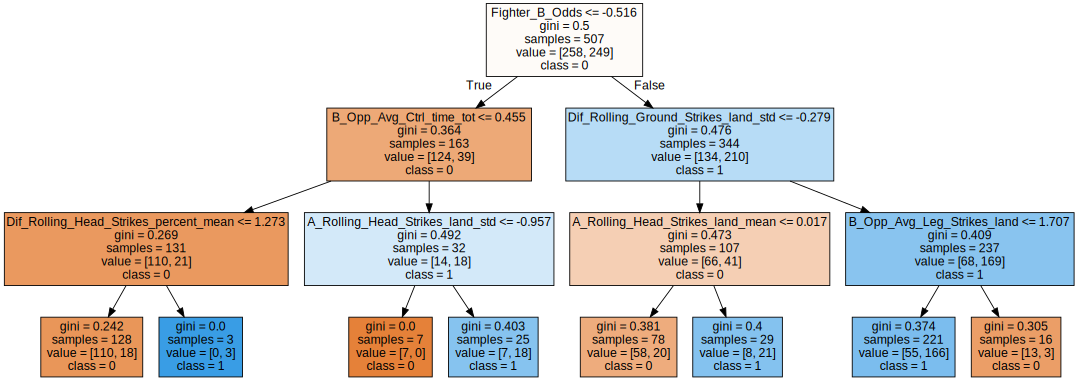

In [41]:

# Access the decision tree model from the pipeline
decision_tree_model = dt_gridsearch.best_estimator_['model']

# Get the numerical column names
numerical_feature_names = numerical_columns

# Get the one-hot-encoded categorical column names
categorical_feature_names = feature_names_categorical

# Combine numerical and one-hot-encoded categorical column names
feature_names = numerical_feature_names + list(categorical_feature_names)

# Get the unique class names (sorted) and convert them to strings
class_names = sorted(y.unique().astype(str))

# Export the decision tree to Graphviz format
dot_data = export_graphviz(decision_tree_model, feature_names=feature_names,
                           class_names=class_names, filled=True)

# Add size attribute to the dot_data string (width, height) in inches
dot_data = dot_data.replace("digraph Tree {", 'digraph Tree { size="15,10";')

graph = graphviz.Source(dot_data)
graph

In [42]:

# Get the numerical column names
numerical_feature_names = numerical_columns

# Get the one-hot-encoded categorical column names
categorical_feature_names = feature_names_categorical

# Combine numerical and one-hot-encoded categorical column names
feature_names = numerical_feature_names + list(categorical_feature_names)

# Get the unique class names (sorted) and convert them to strings
class_names = sorted(y.unique().astype(str))

def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        # This is a leaf node, get the predicted class
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        # Construct the explanation for the leaf node
        explanation.append(f'Then this observation is classified as "{class_name}".')
        return '\n'.join(explanation)
    else:
        # This is an internal node, get the feature and threshold for the decision rule
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]
        # Construct the explanation for the decision rule
        if depth == 0:
            explanation.append(f'If the {feature} <= {threshold:.2f},')
        else:
            explanation.append(f'and if the {feature} <= {threshold:.2f},')
        # Recur on the left subtree (True branch)
        left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())
        # Update the explanation for the right branch
        explanation[-1] = explanation[-1].replace('<=', '>')
        # Recur on the right subtree (False branch)
        right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())
        return f'{left_explanation}\n\nOtherwise, {right_explanation}'
    

# Use the recursive function to generate the explanation
explanation = explain_tree(decision_tree_model, feature_names, class_names)
print(explanation)

If the Fighter_B_Odds <= -0.52,
and if the B_Opp_Avg_Ctrl_time_tot <= 0.46,
and if the Dif_Rolling_Head_Strikes_percent_mean <= 1.27,
Then this observation is classified as "0".

Otherwise, If the Fighter_B_Odds <= -0.52,
and if the B_Opp_Avg_Ctrl_time_tot <= 0.46,
and if the Dif_Rolling_Head_Strikes_percent_mean > 1.27,
Then this observation is classified as "1".

Otherwise, If the Fighter_B_Odds <= -0.52,
and if the B_Opp_Avg_Ctrl_time_tot > 0.46,
and if the A_Rolling_Head_Strikes_land_std <= -0.96,
Then this observation is classified as "0".

Otherwise, If the Fighter_B_Odds <= -0.52,
and if the B_Opp_Avg_Ctrl_time_tot > 0.46,
and if the A_Rolling_Head_Strikes_land_std > -0.96,
Then this observation is classified as "1".

Otherwise, If the Fighter_B_Odds > -0.52,
and if the Dif_Rolling_Ground_Strikes_land_std <= -0.28,
and if the A_Rolling_Head_Strikes_land_mean <= 0.02,
Then this observation is classified as "0".

Otherwise, If the Fighter_B_Odds > -0.52,
and if the Dif_Rolling_Gro

In [43]:
def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
    samples = decision_tree.tree_.n_node_samples[node]
    values = decision_tree.tree_.value[node][0]
    value_proportions = values / sum(values)
    gini_impurity = decision_tree.tree_.impurity[node]

    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        explanation.append(f'Then this observation is classified as "{class_name}".')
        return '\n'.join(explanation)
    else:
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]

        if depth == 0:
            explanation.append(f'If the {feature} <= {threshold:.2f},')
        else:
            explanation.append(f'and if the {feature} <= {threshold:.2f},')

        explanation.append(f'This node has {samples} samples, with class proportions: {", ".join([f"{class_names[i]}: {value_proportions[i]:.2f}" for i in range(len(values))])}.')
        explanation.append(f'The Gini impurity for this node is {gini_impurity:.2f}.')

        left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())

        explanation[-3] = explanation[-3].replace('<=', '>')
        right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())

        return f'{left_explanation}\n\nOtherwise, {right_explanation}'

explanation = explain_tree(decision_tree_model, feature_names, class_names)
print(explanation)


If the Fighter_B_Odds <= -0.52,
This node has 507 samples, with class proportions: 0: 0.51, 1: 0.49.
The Gini impurity for this node is 0.50.
and if the B_Opp_Avg_Ctrl_time_tot <= 0.46,
This node has 163 samples, with class proportions: 0: 0.76, 1: 0.24.
The Gini impurity for this node is 0.36.
and if the Dif_Rolling_Head_Strikes_percent_mean <= 1.27,
This node has 131 samples, with class proportions: 0: 0.84, 1: 0.16.
The Gini impurity for this node is 0.27.
Then this observation is classified as "0".

Otherwise, If the Fighter_B_Odds <= -0.52,
This node has 507 samples, with class proportions: 0: 0.51, 1: 0.49.
The Gini impurity for this node is 0.50.
and if the B_Opp_Avg_Ctrl_time_tot <= 0.46,
This node has 163 samples, with class proportions: 0: 0.76, 1: 0.24.
The Gini impurity for this node is 0.36.
and if the Dif_Rolling_Head_Strikes_percent_mean > 1.27,
This node has 131 samples, with class proportions: 0: 0.84, 1: 0.16.
The Gini impurity for this node is 0.27.
Then this observa

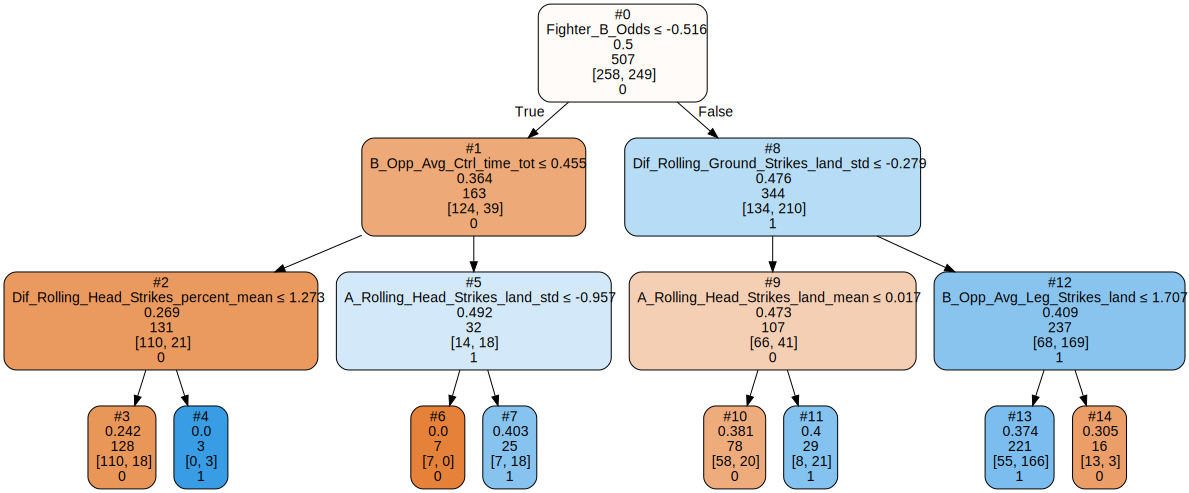

In [44]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        explanation.append(f'Then this observation is classified as "{class_name}".')
        return explanation
    else:
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]
        if depth == 0:
            explanation.append(f'If the {feature} <= {threshold:.2f},')
        else:
            explanation.append(f'and if the {feature} <= {threshold:.2f},')
        left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())
        explanation[-1] = explanation[-1].replace('<=', '>')
        right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())
        return left_explanation + right_explanation

node_explanations = explain_tree(decision_tree_model, feature_names, class_names)

def my_node_label(node):
    return node_explanations[node]

dot_data = export_graphviz(decision_tree_model, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True, node_ids=True, label=my_node_label)
graph = graphviz.Source(dot_data)
display(graph)



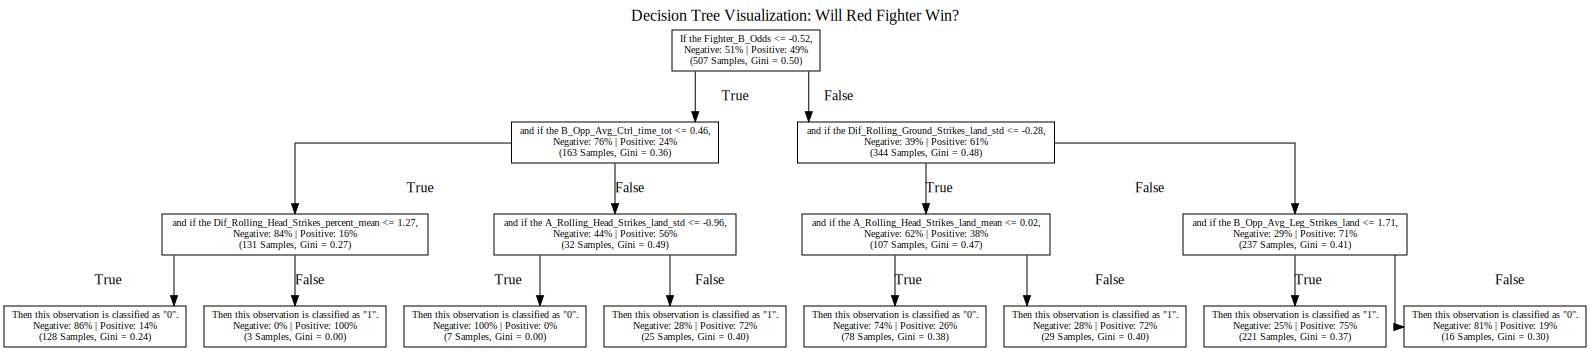

In [45]:
import graphviz
from sklearn.tree import _tree

def build_graph(decision_tree, feature_names, class_names, title, label_0='No', label_1='Yes', node=0, depth=0, parent=None, branch=None):
    samples = decision_tree.tree_.n_node_samples[node]
    values = decision_tree.tree_.value[node][0]
    value_proportions = values / sum(values)
    gini_impurity = decision_tree.tree_.impurity[node]

    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        explanation = f'Then this observation is classified as "{class_name}".'
    else:
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]
        explanation = f'If the {feature} <= {threshold:.2f},' if depth == 0 else f'and if the {feature} <= {threshold:.2f},'

    explanation += (f'\n{label_0}: {value_proportions[0]*100:.0f}% | {label_1}: {value_proportions[1]*100:.0f}%'
                    f'\n({samples} Samples, Gini = {gini_impurity:.2f})')
    graph.node(str(node), label=explanation, shape='rectangle', fontsize='10')

    if parent is not None:
        graph.edge(str(parent), str(node), label=branch)

    if decision_tree.tree_.children_left[node] != _tree.TREE_LEAF:
        build_graph(decision_tree, feature_names, class_names, title, label_0, label_1, decision_tree.tree_.children_left[node], depth+1, node, "True")
        build_graph(decision_tree, feature_names, class_names, title, label_0, label_1, decision_tree.tree_.children_right[node], depth+1, node, "False")

# Create a new Graphviz graph
graph = graphviz.Digraph(format='png', graph_attr={'splines': 'ortho', 'ranksep': '0.5'})

# Specify custom labels for class 0 and class 1
custom_label_0 = 'Negative'
custom_label_1 = 'Positive'

# Specify the title for the graph
graph_title = 'Decision Tree Visualization: Will Red Fighter Win?'

# Set the title for the graph
graph.attr(label=graph_title, labelloc='t', fontsize='16')

# Call the build_graph function to construct the graph recursively
build_graph(decision_tree_model, feature_names, class_names, graph_title, custom_label_0, custom_label_1)

# Display the graph once it has been fully constructed
display(graph)